In [1]:
import pandas as pd
import numpy as np
import os 
import shutil

In [10]:
df = pd.read_csv("/kaggle/input/isic-2024-training-supplement-csv/ISIC_2024_Training_Supplement.csv")

/tmp/ipykernel_34/2198168844.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/isic-2024-training-supplement-csv/ISIC_2024_Training_Supplement.csv")


In [11]:
df.head()

,isic_id,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [12]:
data = df.drop(columns = ['attribution','copyright_license','lesion_id','iddx_full','iddx_2','iddx_3','iddx_4','iddx_5','mel_mitotic_index','mel_thick_mm'])

In [13]:
filtered_df = data[data['tbp_lv_dnn_lesion_confidence'] > 99]


In [14]:
filtered_df.head()

,isic_id,iddx_1,tbp_lv_dnn_lesion_confidence
2,ISIC_0015864,Benign,99.804040
3,ISIC_0015902,Benign,99.989998
5,ISIC_0035502,Benign,99.619603
6,ISIC_0051648,Benign,99.918133
7,ISIC_0051665,Benign,99.972390


In [15]:
filtered_df.describe()

,tbp_lv_dnn_lesion_confidence
count,324584.000000
mean,99.931968
std,0.168167
min,99.000019
25%,99.969550
50%,99.998963
75%,99.999988
max,100.000000


In [16]:
count = filtered_df['iddx_1'].value_counts()
count

iddx_1
Benign           324275
Malignant           223
Indeterminate        86
Name: count, dtype: int64

In [17]:
filtered_df_2 = filtered_df[filtered_df['iddx_1'] != "Indeterminate"]


In [18]:
filtered_df_2.describe()

,tbp_lv_dnn_lesion_confidence
count,324498.000000
mean,99.931969
std,0.168164
min,99.000019
25%,99.969550
50%,99.998963
75%,99.999988
max,100.000000


In [19]:
count = filtered_df_2['iddx_1'].value_counts()
count

iddx_1
Benign       324275
Malignant       223
Name: count, dtype: int64

In [20]:
image_dir_path = "/kaggle/input/isic-2024-challenge/train-image/image"



In [21]:
image_paths = []
split_dataset = '/kaggle/working/dataset'
images_dir = image_dir_path

list_dirs = ["Benign","Malignant"]

os.makedirs(split_dataset , exist_ok =True)
x = filtered_df_2.iloc[:,0].values
y = filtered_df_2.iloc[:,1].values

In [22]:
x,y

(array(['ISIC_0015864', 'ISIC_0015902', 'ISIC_0035502', ...,
        'ISIC_9999960', 'ISIC_9999964', 'ISIC_9999967'], dtype=object),
 array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
       dtype=object))

In [23]:



for item in list_dirs:
    print(item)
    os.makedirs(os.path.join(split_dataset,str(item)) , exist_ok = True)







for i in range(len(filtered_df_2)):
    image_path = os.path.join(images_dir,str(x[i])+".jpg")
    if str(y[i]) == "Benign" :
        new_path = os.path.join(split_dataset,"Benign",str(x[i])+".jpg")
        shutil.copyfile(image_path, new_path)
        
        
    if str(y[i]) == "Malignant" :
        new_path = os.path.join(split_dataset,"Malignant",str(x[i])+".jpg")
        shutil.copyfile(image_path, new_path)
        


Benign
Malignant


In [24]:
from shutil import copyfile
def dir_split(data_dir,new_dataset_dir):
    os.makedirs(new_dataset_dir , exist_ok =True)


    train_dir = os.path.join(new_dataset_dir, 'train')
    test_dir = os.path.join(new_dataset_dir , 'test')
    val_dir = os.path.join(new_dataset_dir, 'val')


    if not os.path.exists(train_dir):
        os.makedirs(train_dir)

    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    if not os.path.exists(val_dir):
        os.makedirs(val_dir)

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        dir_size = len(os.listdir(class_path))

        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)    
        val_class_dir = os.path.join(val_dir, class_name)    


        if not os.path.exists(train_class_dir):
            os.makedirs(train_class_dir)
        if not os.path.exists(test_class_dir):
            os.makedirs(test_class_dir)
        if not os.path.exists(val_class_dir):
            os.makedirs(val_class_dir)

        images = os.listdir(class_path)

        train_size = int(len(images)*0.6)
        test_size = int(len(images)*0.8)
        val_size = int(len(images))

        for i in range(train_size):
            copyfile(os.path.join(class_path, images[i]), os.path.join(train_class_dir, images[i]))

        for i in range(train_size,test_size):
            copyfile(os.path.join(class_path, images[i]), os.path.join(test_class_dir, images[i]))

        for i in range(test_size,val_size):
            copyfile(os.path.join(class_path, images[i]), os.path.join(val_class_dir, images[i]))





    return train_dir , test_dir , val_dir

split_dataset = '/kaggle/working/test_train_dataset'

dataset = '/kaggle/working/dataset'
train_dir , test_dir , val_dir = dir_split(dataset , split_dataset)

In [25]:
def remove_all():
    def remove_all_files(directory):
        for filename in os.listdir(directory):
            file_path = os.path.join(directory, filename)
            try:
                if os.path.isfile(file_path):
                    os.remove(file_path)

            except Exception as e:
                print(f"Error while deleting file {file_path}: {e}")
        os.rmdir(directory)

    remove_all_files('/kaggle/working/dataset/Malignant')
    remove_all_files('/kaggle/working/dataset/Benign')
    remove_all_files('/kaggle/working/dataset')




remove_all()



# vit


In [26]:
import os
import pandas as pd
import numpy as np
import shutil
from shutil import copyfile
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape,Dropout)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
import tensorflow as tf


2024-07-24 19:30:54.805520: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 19:30:54.805642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 19:30:54.941452: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
#config

CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 121,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 2,
    "PATCH_SIZE": 11,
    "PROJ_DIM": 363,
    "CLASS_NAMES": ['Benign','Malignant'],
}


In [28]:

class PatchEncoder(Layer):
    def __init__(self, N_PATCHES, HIDDEN_SIZE):
        super(PatchEncoder, self).__init__(name='patch_encoder')
        self.linear_projection = Dense(HIDDEN_SIZE)
        self.positional_embedding = Embedding(N_PATCHES, HIDDEN_SIZE)
        self.N_PATCHES = N_PATCHES

    def call(self, x):
        # Resize input images to (256, 256, 3)
        x = tf.image.resize(x, [121, 121])
        #x = tf.image.resize(x, [CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]])
        
        patches = tf.image.extract_patches(
            images=x,
            sizes=[1, CONFIGURATION["PATCH_SIZE"], CONFIGURATION["PATCH_SIZE"], 1],
            strides=[1, CONFIGURATION["PATCH_SIZE"], CONFIGURATION["PATCH_SIZE"], 1],
            rates=[1, 1, 1, 1],
            padding='VALID')

        patch_dim = patches.shape[-1]
        patches = tf.reshape(patches, (tf.shape(x)[0], -1, patch_dim))

        embedding_input = tf.range(start=0, limit=self.N_PATCHES, delta=1)
        output = self.linear_projection(patches) + self.positional_embedding(embedding_input)

        return output
    
    
    
    


class TransformerEncoder(Layer):
    def __init__(self, N_HEADS, HIDDEN_SIZE):
        super(TransformerEncoder, self).__init__(name='transformer_encoder')
        self.layer_norm_1 = LayerNormalization()
        self.layer_norm_2 = LayerNormalization()
        self.dropout_1 = Dropout( rate = 0.2 )

        self.dropout_2 = Dropout(rate = 0.2)

        self.multi_head_att = MultiHeadAttention(num_heads=N_HEADS, key_dim=HIDDEN_SIZE)
        self.dense_1 = Dense(HIDDEN_SIZE, activation=tf.nn.gelu)
        self.dense_2 = Dense(HIDDEN_SIZE, activation=tf.nn.gelu)

    def call(self, inputs):
        x_1 = self.layer_norm_1(inputs)
        x_1 = self.dropout_1(x_1)
        x_1 = self.multi_head_att(x_1, x_1)
        x_1 = Add()([x_1, inputs])
        x_2 = self.layer_norm_2(x_1)
        x_2 = self.dropout_2(x_2)
        x_2 = self.dense_1(x_2)
        output = self.dense_2(x_2)
        output = Add()([output, x_1])
        return output

class ViT(Model):
    def __init__(self, N_HEADS, HIDDEN_SIZE, N_PATCHES, N_LAYERS, N_DENSE_UNITS):
        super(ViT, self).__init__(name='vision_transformer')
        self.N_LAYERS = N_LAYERS
        self.patch_encoder = PatchEncoder(N_PATCHES, HIDDEN_SIZE)
        self.trans_encoders = [TransformerEncoder(N_HEADS, HIDDEN_SIZE) for _ in range(N_LAYERS)]
        self.layer_norm_1 = LayerNormalization()
        self.dropout_1 = Dropout( rate = 0.2 )
        self.dropout_2 = Dropout(rate = 0.2)
        self.dense_1 = Dense(N_DENSE_UNITS, activation=tf.nn.gelu)
        self.dense_2 = Dense(N_DENSE_UNITS, activation=tf.nn.gelu)
        
        self.dense_3 = Dense(CONFIGURATION["NUM_CLASSES"], activation='softmax')

    def call(self, inputs, training=None):
        x = self.patch_encoder(inputs)
        for i in range(self.N_LAYERS):
            x = self.trans_encoders[i](x)
        x = Flatten()(x)
        x = self.layer_norm_1(x)
        x = self.dense_1(x)
        x = self.dropout_1(x)
        x = self.dense_2(x)
        x = self.dropout_2(x)
        return self.dense_3(x)


In [29]:
vit = ViT(
    N_HEADS = 4, HIDDEN_SIZE = 363, N_PATCHES = 121,
    N_LAYERS = 8, N_DENSE_UNITS = 128)


In [30]:
vit(tf.zeros([32,121,121,3]))

<tf.Tensor: shape=(32, 2), dtype=float32, numpy=
array([[0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.5599701 ],
       [0.44002995, 0.55997

In [31]:
vit.summary()

Model: "vision_transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ patch_encoder (PatchEncoder)    │ ?                      │       176,055 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ ?                      │     2,378,739 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ ?                      │     2,378,739 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │     5,622,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,572,575 (40.33 MB)

 Trainable params: 10,572,575 (40.33 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy


loss_function = CategoricalCrossentropy()

metrics = [CategoricalAccuracy(name = "accuracy"), TopKCategoricalAccuracy(k=2, name = "top_k_accuracy")]

In [33]:
vit.compile(optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"] ),
           loss = loss_function,
           metrics = metrics)

In [34]:
train_directory = "/kaggle/working/test_train_dataset/train"

val_directory = "/kaggle/working/test_train_dataset/val"


train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 194698 files belonging to 2 classes.
Found 64900 files belonging to 2 classes.


In [35]:
augment_layers = tf.keras.Sequential([
  RandomRotation(factor = (-0.025, 0.025)),
  RandomFlip(mode='horizontal',),
  RandomContrast(factor=0.1),
])
def augment_layer(image, label):
  return augment_layers(image, training = True), label

In [36]:
training_dataset = (
    train_dataset
    .map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)
validation_dataset = (
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [37]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 121, 121, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [38]:
history = vit.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs = CONFIGURATION["N_EPOCHS"],
verbose = 1)

Epoch 1/20
   3/6085 ━━━━━━━━━━━━━━━━━━━━ 4:04 40ms/step - accuracy: 0.3889 - loss: 175.1378 - top_k_accuracy: 1.0000       

I0000 00:00:1721849495.360642      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721849495.384390      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6085/6085 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9939 - loss: 213.1212 - top_k_accuracy: 1.0000

W0000 00:00:1721849726.410665      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6085/6085 ━━━━━━━━━━━━━━━━━━━━ 399s 64ms/step - accuracy: 0.9939 - loss: 213.1112 - top_k_accuracy: 1.0000 - val_accuracy: 0.9993 - val_loss: 829.7639 - val_top_k_accuracy: 1.0000
Epoch 2/20
6085/6085 ━━━━━━━━━━━━━━━━━━━━ 378s 62ms/step - accuracy: 0.9979 - loss: 124.7138 - top_k_accuracy: 1.0000 - val_accuracy: 0.9993 - val_loss: 0.0057 - val_top_k_accuracy: 1.0000
Epoch 3/20
6085/6085 ━━━━━━━━━━━━━━━━━━━━ 378s 62ms/step - accuracy: 0.9993 - loss: 0.0059 - top_k_accuracy: 1.0000 - val_accuracy: 0.9993 - val_loss: 0.0057 - val_top_k_accuracy: 1.0000
Epoch 4/20
6085/6085 ━━━━━━━━━━━━━━━━━━━━ 379s 62ms/step - accuracy: 0.9993 - loss: 0.0059 - top_k_accuracy: 1.0000 - val_accuracy: 0.9993 - val_loss: 0.0057 - val_top_k_accuracy: 1.0000
Epoch 5/20
6085/6085 ━━━━━━━━━━━━━━━━━━━━ 380s 62ms/step - accuracy: 0.9978 - loss: 151.8701 - top_k_accuracy: 1.0000 - val_accuracy: 0.9993 - val_loss: 676.6000 - val_top_k_accuracy: 1.0000
Epoch 6/20
6085/6085 ━━━━━━━━━━━━━━━━━━━━ 381s 62ms/step - accurac

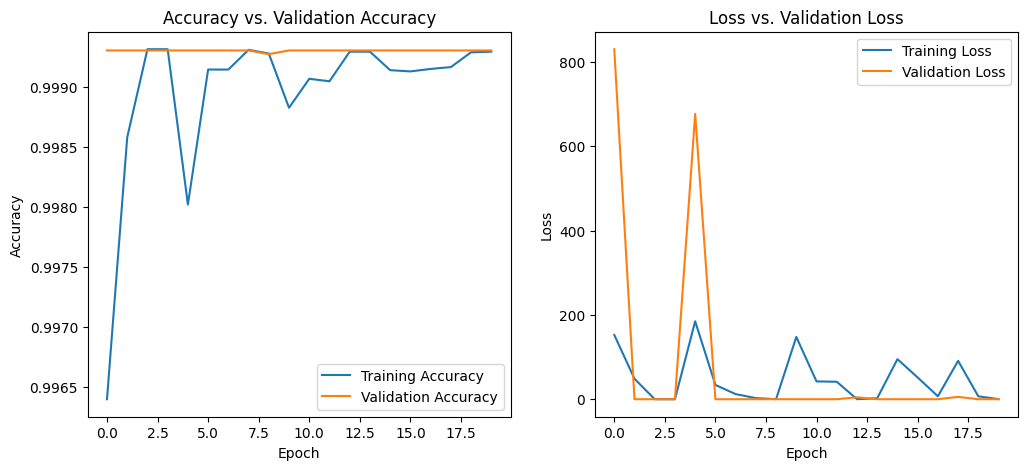

In [39]:
import matplotlib.pyplot as plt

# Assuming `history` is the variable containing the training history from model.fit()
# history = model.fit(...)

# Plot accuracy vs val_accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Validation Accuracy')
plt.legend()

# Plot loss vs val_loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Validation Loss')
plt.legend()

plt.show()


In [41]:

model_dir = "/kaggle/working/models"
os.makedirs(model_dir , exist_ok = True)
path_to_my_model = "/kaggle/working/models/vit_isic.keras"
vit.save(path_to_my_model)


In [46]:
path_to_my_model = "/kaggle/working/models/vit_isic.keras"



In [53]:
# Save only the weights of the model
vit.save_weights("/kaggle/working/models/vit_isic.weights.h5")


In [54]:
test_images_df = pd.read_csv('/kaggle/input/isic-2024-challenge/test-metadata.csv')
test_image_ids = test_images_df['isic_id']


In [56]:
test_image_ids.head

<bound method NDFrame.head of 0    ISIC_0015657
1    ISIC_0015729
2    ISIC_0015740
Name: isic_id, dtype: object>

In [78]:
image_path = os.path.join("/kaggle/input/isic-2024-challenge/train-image/image","ISIC_0015729.jpg")
img = cv2.imread(image_path)

[ WARN:0@253.652] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/isic-2024-challenge/train-image/image/ISIC_0015729.jpg'): can't open/read file: check file path/integrity


In [81]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

def load_and_preprocess_image(image_path, target_size):
    if not os.path.exists(image_path):
        print(f"[ERROR] File does not exist: {image_path}")
        return None
    if not os.access(image_path, os.R_OK):
        print(f"[ERROR] File is not readable: {image_path}")
        return None
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"[ERROR] Failed to read image (None returned): {image_path}")
            return None
        image = cv2.resize(image, target_size)
        return image
    except Exception as e:
        print(f"[ERROR] Failed to process image {image_path}: {e}")
        return None

image_dir = '/kaggle/input/isic-2024-challenge/train-image/image'

all_image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

image_ids = [os.path.splitext(os.path.basename(file))[0] for file in all_image_files]
data_df = pd.DataFrame({'isic_id': image_ids, 'image_path': all_image_files})

train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42)

test_df.to_csv('test_images.csv', index=False)

test_images_df = pd.read_csv('test_images.csv')
test_image_ids = test_images_df['isic_id']
image_paths = test_images_df['image_path']


target_size = (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])  

test_images = []
valid_image_ids = []
for image_path, image_id in zip(image_paths, test_image_ids):
    image = load_and_preprocess_image(image_path, target_size)
    if image is not None:
        test_images.append(image)
        valid_image_ids.append(image_id)



In [82]:
if test_images:
    test_images = np.array(test_images)

    # Predict probabilities
    predictions = vit.predict(test_images)
    predicted_probabilities = predictions[:, 1]  # Assuming the second column is the probability of being malignant

    # Create a DataFrame with the predictions
    submission_df = pd.DataFrame({
        'isic_id': valid_image_ids,
        'target': predicted_probabilities
    })

    # Save the predictions to a CSV file
    submission_df.to_csv('submission.csv', index=False)

    print('Submission file saved successfully.')
else:
    print('No valid images to process.')


  18/2507 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step

W0000 00:00:1721859990.171650      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2507/2507 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step


W0000 00:00:1721860014.294483      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Submission file saved successfully.
